# Annotation Processing

**In this Notebook**:  
Annotation files by different annotators (for a given `AnnotationTask` object) are loaded together in an `AnnotationSet` object. This allows to compute:
- annotator statistics (distribution of labels, nb of annotations)
- IAA scores  
- confusion matrices between pairs of annotators 

This also allows to extract the subset of annotations which are found to be  **ambiguous** and need adjudication (annotator disagreement / comments left, indicating doubts).\\

ANNOTATION FILES HAVE BEEN ARCHIVED. FOR ILLUSTRATION PURPOSES, THIS NOTEBOOK STILL ALLOWS A DEMO ON ANNOTATIONS CONDUCTED IN PHASE 2, WITH 4 ANNOTATORS. 

In [1]:
import pandas as pd
import os
import sys
sys.path.append("../")
from utils.anno import AnnotationSet, AnnotationTask
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Second annotation trial

4 annotators, with 2 papers (176 sentences) to annotate.
Guidelines: v2.

In [19]:
ANNO_DIR_PATH = "anno-results-2/"

task = AnnotationTask(
    title = "claims-classification",
    guidelines_path = "guidelines_v2.pdf",
    labels = ["POS", "NEG", "FACT", "PROSP", "NC", "RW"],
    annotators = ["anno1", "anno2", "anno5", "anno6"],
)


aset = AnnotationSet(ANNO_DIR_PATH, task = task)

In [20]:
aset.annotations.head()

,idx,text,sec,prev_sec,prev_sent,next_sec,next_sent,label_anno1,comments_anno1,label_anno2,comments_anno2,label_anno5,comments_anno5,label_anno6,comments_anno6
0,3075788,We propose a software architecture designed to...,abstract,NaN,NaN,abstract,The Modular Architecture for Conversational Ag...,FACT,,FACT,,FACT,,POS,
1,3075789,The Modular Architecture for Conversational Ag...,abstract,abstract,We propose a software architecture designed to...,abstract,The architecture separates the domain of the c...,POS,,POS,,PROSP,,POS,
2,3075790,The architecture separates the domain of the c...,abstract,abstract,The Modular Architecture for Conversational Ag...,abstract,MACA provides tools to host dialogue agents on...,NC,,POS,,PROSP,,POS,
3,3075791,MACA provides tools to host dialogue agents on...,abstract,abstract,The architecture separates the domain of the c...,abstract,The current version of the framework already i...,FACT,,POS,,FACT,,POS,
4,3075792,The current version of the framework already i...,abstract,abstract,MACA provides tools to host dialogue agents on...,Introduction,Recent research in building sophisticated AIba...,FACT,,POS,,FACT,,POS,


In [21]:
aset.compute_agreement_metrics()

In [22]:
aset.ia_metrics["cohen_kappa"]

,anno1,anno2,anno5,anno6
anno1,1.000000,0.723103,0.727209,0.634671
anno2,0.723103,1.000000,0.617465,0.656656
anno5,0.727209,0.617465,1.000000,0.633973
anno6,0.634671,0.656656,0.633973,1.000000


<Axes: >

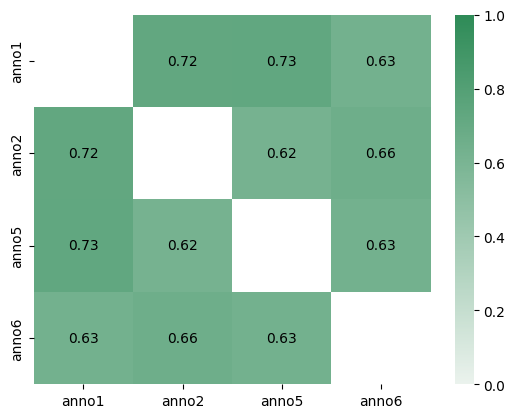

In [23]:
sns.heatmap(aset.ia_metrics["cohen_kappa"], cmap=sns.light_palette("seagreen", as_cmap=True), annot=True, vmin=0, vmax=1, mask=np.eye(4), annot_kws={"color": "black"})


In [24]:
print(aset.ia_metrics["krippendorff_alpha"])
aset.compute_krippendorff_alpha(split_multi_labels=True)
print(aset.ia_metrics["krippendorff_alpha"])

0.6644990828427608
0.671560225749785


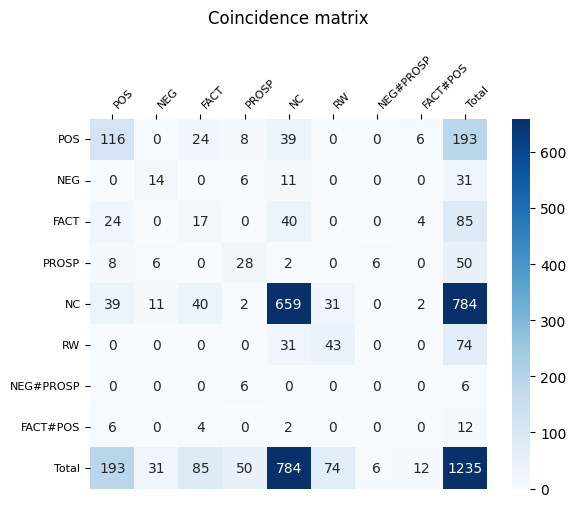

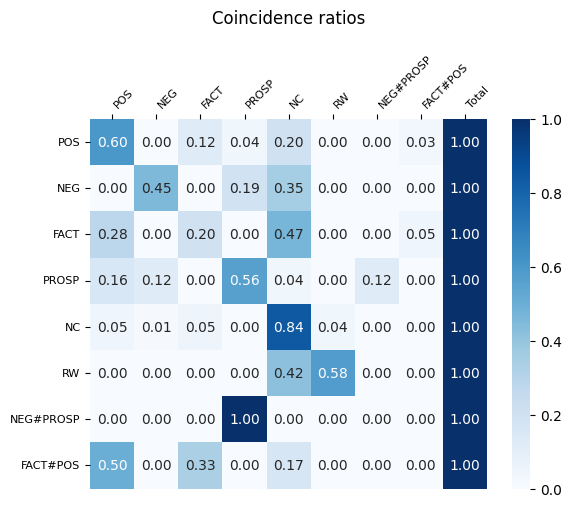

In [8]:
anno_pairs = aset.compute_coincidences(split_multi_labels = False)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.multi_labels)

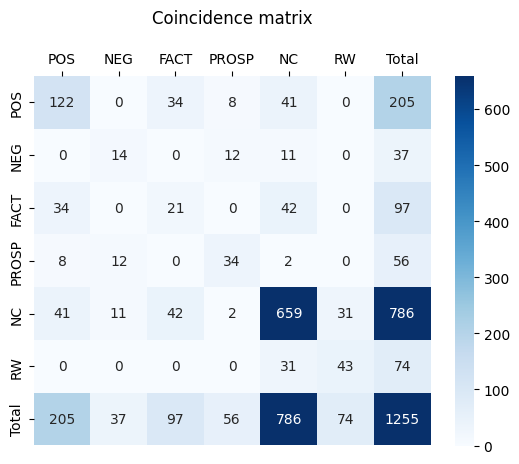

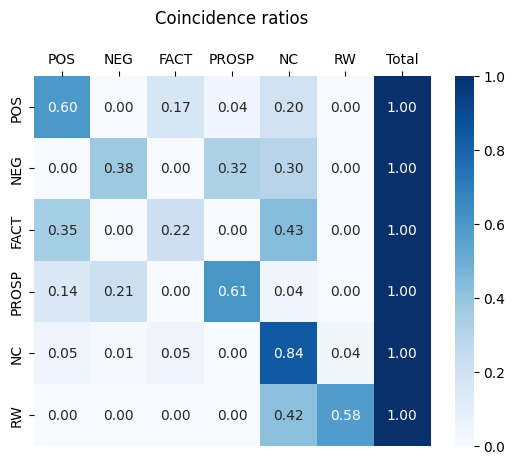

In [9]:
anno_pairs = aset.compute_coincidences(split_multi_labels = True)
AnnotationSet.plot_coincidence_matrices(anno_pairs, task.labels)

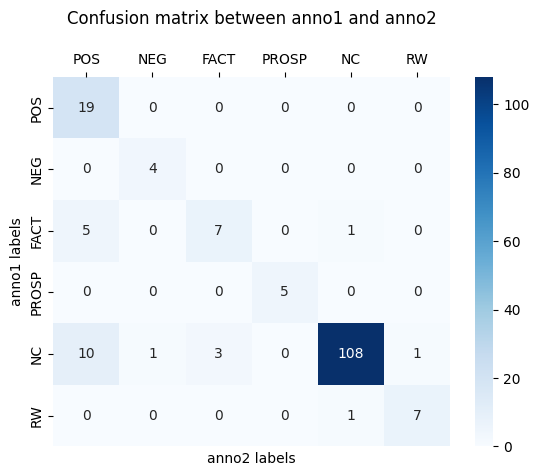

In [10]:
aset.plot_confusion_matrix_for_anno_pair(0, 1)

In [11]:
aset.annotations[aset.annotations["label_anno1"] != aset.annotations["label_anno2"]].shape

(26, 15)

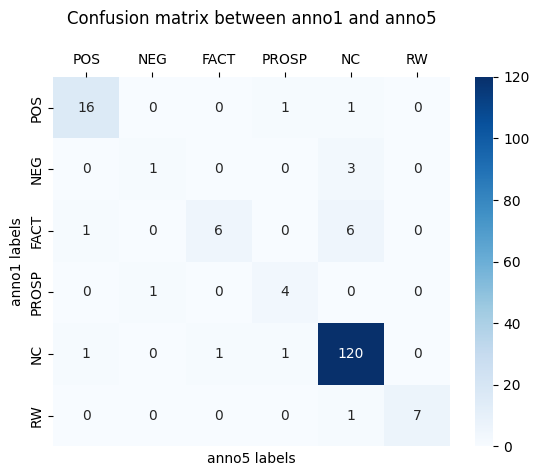

In [12]:
aset.plot_confusion_matrix_for_anno_pair(0, 2)

In [16]:
aset.stats["anno"] = [a for a in task.annotators]
aset.stats

,POS,NEG,FACT,PROSP,NC,RW,total,POS_rr,NEG_rr,FACT_rr,PROSP_rr,NC_rr,RW_rr,completion_r,anno
anno1,20,6,15,7,123,8,176,0.113636,0.034091,0.085227,0.039773,0.698864,0.045455,1.0,anno1
anno2,35,5,12,7,110,8,176,0.198864,0.028409,0.068182,0.039773,0.625000,0.045455,1.0,anno2
anno5,20,2,9,8,132,7,176,0.113636,0.011364,0.051136,0.045455,0.750000,0.039773,1.0,anno5
anno6,32,4,2,6,116,16,176,0.181818,0.022727,0.011364,0.034091,0.659091,0.090909,1.0,anno6


In [17]:
anno_labels = {}
for anno in task.annotators:
    l = aset.stats[aset.stats["anno"] == anno][task.labels].values[0].tolist()
    anno_labels[anno] = (int(l[0]), int(l[1]), int(l[2]), int(l[3]), int(l[4]), int(l[5]))

anno_labels

{'anno1': (20, 6, 15, 7, 123, 8),
 'anno2': (35, 5, 12, 7, 110, 8),
 'anno5': (20, 2, 9, 8, 132, 7),
 'anno6': (32, 4, 2, 6, 116, 16)}

In [18]:
for anno, labels in anno_labels.items():
    print(anno, labels)
    print()

anno1 (20, 6, 15, 7, 123, 8)

anno2 (35, 5, 12, 7, 110, 8)

anno5 (20, 2, 9, 8, 132, 7)

anno6 (32, 4, 2, 6, 116, 16)



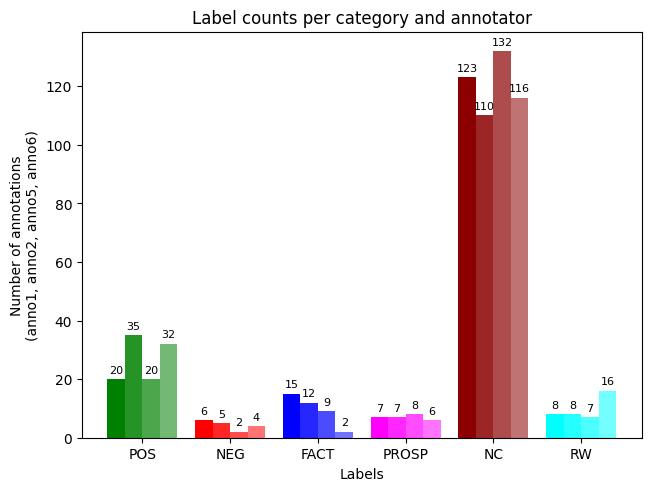

In [19]:
fig, ax = plt.subplots(layout = "constrained")

x = np.arange(len(task.labels))
width = 1/ (len(aset.task.annotators) + 1)
multiplier = 0

for anno, labels in anno_labels.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, labels, width, label = anno, color = sns.color_palette(["green", "red", "blue", "magenta", "darkred", "cyan"]), alpha = 1 - 0.15 * multiplier)
    ax.bar_label(rects, padding = 3, fontsize = 8)
    multiplier += 1

ax.set_ylabel(f"Number of annotations\n(anno1, anno2, anno5, anno6)")
ax.set_xlabel("Labels")
ax.set_title("Label counts per category and annotator")
ax.set_xticks(x + width * 1.5, task.labels)

plt.show()


In [20]:
art1 = aset.annotations[aset.annotations["idx"].astype(str).str.startswith("307")]
lab2idx = {l: i for i, l in enumerate(task.labels)}

a = []
for anno in task.annotators:
    labels = art1[f"label_{anno}"].values.tolist()
    idxs = [lab2idx[l] if l in lab2idx else 6 for l in labels]
    a.append(idxs)

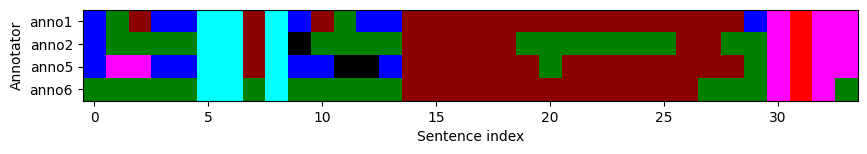

In [21]:
a = np.array(a)
colors = {0: "green", 1: "red", 2: "blue", 3: "magenta", 4: "darkred", 5: "cyan", 6: "black"}
rgb_map = {"green": [0, 128, 0], "red": [255, 0, 0], "blue": [0, 0, 255], "magenta": [255, 0, 255], "darkred": [139, 0, 0], "cyan": [0, 255, 255], "black": [0, 0, 0]}
rgb = {i:rgb_map[colors[i]] for i in range(7)}

fig = plt.figure(figsize = (10, 10))

img = np.array([[rgb[val] for val in row] for row in a], dtype = "B")
plt.imshow(img)
plt.xlabel("Sentence index")
plt.ylabel("Annotator")
plt.yticks(range(4), task.annotators)
plt.show()

In [22]:
art2 = aset.annotations[aset.annotations["idx"].astype(str).str.startswith("8")]
lab2idx = {l: i for i, l in enumerate(task.labels)}

3


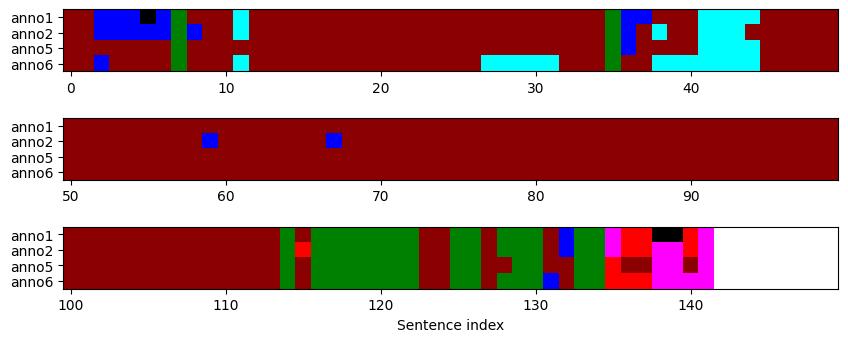

In [23]:
import matplotlib

a = []
for anno in task.annotators:
    labels = art2[f"label_{anno}"].values.tolist()
    idxs = [lab2idx[l] if l in lab2idx else 6 for l in labels]
    a.append(idxs)

a = np.array(a)

# split a in sub-arrays whose elements are of length 50 maximum
sub_arrays = []
for i in range(0, a.shape[1], 50):
    if i + 50 > a.shape[1]:
        # fill with 6 
        sub_arrays.append(np.pad(a[:, i:], ((0, 0), (0, 50 - (a.shape[1] - i))), mode = "constant", constant_values = 7))
    else:
        sub_arrays.append(a[:, i:i+50])

print(len(sub_arrays))


colors = {0: "green", 1: "red", 2: "blue", 3: "magenta", 4: "darkred", 5: "cyan", 6: "black", 7:"white"}
rgb_map = {"green": [0, 128, 0], "red": [255, 0, 0], "blue": [0, 0, 255], "magenta": [255, 0, 255], "darkred": [139, 0, 0], "cyan": [0, 255, 255], "black": [0, 0, 0], "white": [255, 255, 255]}
rgb = {i:rgb_map[colors[i]] for i in range(len(rgb_map))}

fig, axs = plt.subplots(len(sub_arrays), 1, figsize = (10, 4), squeeze = False, sharey = True, sharex = False)

for i, a in enumerate(sub_arrays):

    img = np.array([[rgb[val] for val in row] for row in a], dtype = "B")
    axs[i][0].imshow(img)

    plt.yticks(range(4), task.annotators)
    axs[i][0].set_xticks(range(0, 50, 10))
    axs[i][0].set_xticklabels(range(50*i, 50*(i+1), 10))


#plt.ylabel("Annotator")
plt.xlabel("Sentence index")
plt.show()

In [29]:
df_ambig = aset.annotations[aset.annotations["label_anno1"] != aset.annotations["label_anno2"]]
df_ambig = df_ambig.drop(columns = ["label_anno5", "comments_anno5", "label_anno6", "comments_anno6"])
df_ambig["label"] = [""] * df_ambig.shape[0]
df_ambig.to_csv("ambig-anno1-anno2.csv", index = False)

In [30]:
df_ambig

,idx,text,sec,prev_sec,prev_sent,next_sec,next_sent,label_anno1,comments_anno1,label_anno2,comments_anno2,label
2,3075790,The architecture separates the domain of the c...,abstract,abstract,The Modular Architecture for Conversational Ag...,abstract,MACA provides tools to host dialogue agents on...,NC,,POS,,
3,3075791,MACA provides tools to host dialogue agents on...,abstract,abstract,The architecture separates the domain of the c...,abstract,The current version of the framework already i...,FACT,,POS,,
4,3075792,The current version of the framework already i...,abstract,abstract,MACA provides tools to host dialogue agents on...,Introduction,Recent research in building sophisticated AIba...,FACT,,POS,,
9,3075797,"To address this gap, we propose a new, readyto...",Introduction,Introduction,"Furthermore, the different types of conversati...",Introduction,The architecture simplifies the specification ...,FACT,,FACT#POS,,
10,3075798,The architecture simplifies the specification ...,Introduction,Introduction,"To address this gap, we propose a new, readyto...",Introduction,The framework also maintains a clear separatio...,NC,,POS,,
12,3075800,MACA separates task definition from task selec...,Introduction,Introduction,The framework also maintains a clear separatio...,Introduction,The key characteristics of the MACA framework ...,FACT,,POS,,
13,3075801,The key characteristics of the MACA framework ...,Introduction,Introduction,MACA separates task definition from task selec...,Related Work,There are a few proposed frameworks in recent ...,FACT,,POS,,
19,3075807,This could include a database of previous coll...,Input,Input,This component represents an abstract input de...,Preprocessing,The Pre-processing module serves as a bridge b...,NC,,POS,,
20,3075808,"Through the output component, the architecture...",Output,Postprocessing,"In addition, these post-processing operations ...",Output,"Currently, implemented options are command lin...",NC,,POS,,
21,3075809,"Currently, implemented options are command lin...",Output,Output,"Through the output component, the architecture...",Output,"Similar to the Input component, the output com...",NC,,POS,,


In [26]:
claims = aset.get_consensual_annotations()
claims

,idx,text,label
0,3075788,We propose a software architecture designed to...,FACT
1,3075789,The Modular Architecture for Conversational Ag...,POS
2,3075790,The architecture separates the domain of the c...,POS
3,3075793,Recent research in building sophisticated AIba...,RW
4,3075794,These models have been applied to a variety of...,RW
...,...,...,...
160,8054606,"These triples gives model wrong supervisions, ...",NEG
161,8054607,But this missing annotation issue is still an ...,PROSP
162,8054608,"Second, in the DEE subtask, how to process lon...",PROSP
163,8054609,"In addition, if two arguments of one event are...",NEG


In [48]:
labels, counts = [], []
for l, c in claims.value_counts("label").items():
    labels.append(l)
    counts.append(c)

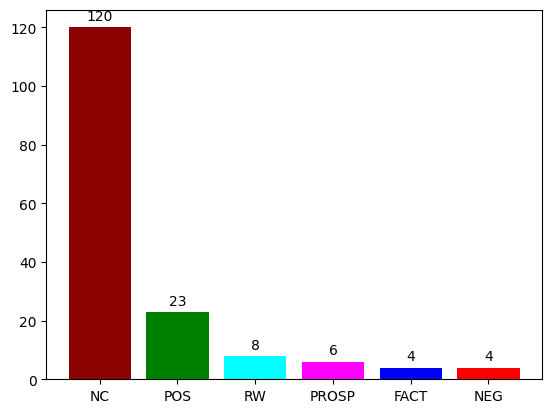

In [57]:
# barplot of the distribution of labels

bars = plt.bar(labels, counts, color = ["darkred", "green", "cyan", "magenta", "blue", "red"])
plt.bar_label(bars, padding = 3)
plt.show()

37 claims collectés pour 2 articles.

In [63]:
type(claims.at[0, "idx"])

numpy.int64

In [72]:
df = claims[claims["idx"].astype(str).str.startswith("8")]

for i, row in df.iterrows():
    text = row["text"]
    label = row["label"]

    if label != "NC":

        print(f"{label.ljust(6)}{text}")
        print()

FACT  Here we describe our system for this multi-format information extraction competition task.

POS   Finally,our system ranks No.4 on the test set leader-board of this multi-format information extraction task, and its F1 scores for the subtasks of relation extraction, event extractions of sentence-level and document-level are 79.887%, 85.179%, and 70.828% respectively.

RW    However, most researches only focus on extracting information in a single format, while lacking a unified †

POS   In our system, we use some effective methods to overcome these challenges.

FACT  Specifically, for the first one, we design a schema disintegration module to convert each multiple-O-values relation into several single-O-value relations, then use a voting based module to obtain the final relations.

RW    A representative Chinese DEE work is [17], whose DEE model contains two main components: a SEE model that extracts event arguments and event triggers from a sentence; and a DEE model that extracts

## Constitution of an annotated corpus

In [25]:
# load the annotations collected by the annotators
df = pd.read_csv("processed-annotations-11-06.csv")
print(df.shape)

(14792, 11)


In [26]:
df.head()

,id,doc_id,paper_title,paper_structure,year,text,section,label,rw,error,Comments
0,59852,3435904,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,Most Semantic Role Labeling (SRL) approaches a...,abstract,context-AIC,False,False,NaN
1,59853,3435905,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,"In this paper, we propose a Multi-Task Active ...",abstract,contribution-AIC,False,False,NaN
2,59854,3435906,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,We evaluate our approach on Indonesian convers...,abstract,contribution-AIC,False,False,NaN
3,59855,3435907,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,Our experiments show that multi-task active le...,abstract,result,False,False,NaN
4,59856,3435908,Multi-Task Active Learning for Neural Semantic...,0. abstract\n1. Introduction\n2. Related Work\...,2018,"According to our results, active learning is m...",abstract,result,False,False,NaN
